<a href="https://colab.research.google.com/github/Shankar-Pankhania/Twitter_Sentiment_Analysis_on_Bitcoin/blob/main/Preprocess_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/drive/')
%cd /content/drive/My Drive/Dissertation/


In [ ]:
import nltk
nltk.download("popular")



In [ ]:
import numpy as np
import pandas as pd
import json, nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [ ]:
import pandas as pd

df = pd.read_csv('bitcoin_tweets.csv')

Stopwords

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Global Parameters
stop_words = set(stopwords.words('english'))

Define a function which handles emoji classifications

In [ ]:
def emoji(tweet):
    # Smile -- :), : ), :-), (:, ( :, (-:, :') , :O
    tweet = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\)|:O)', ' positiveemoji ', tweet)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    tweet = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' positiveemoji ', tweet)
    # Love -- <3, :*
    tweet = re.sub(r'(<3|:\*)', ' positiveemoji ', tweet)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-; , @-)
    tweet = re.sub(r'(;-?\)|;-?D|\(-?;|@-\))', ' positiveemoji ', tweet)
    # Sad -- :-(, : (, :(, ):, )-:, :-/ , :-|
    tweet = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:|:-/|:-\|)', ' negetiveemoji ', tweet)
    # Cry -- :,(, :'(, :"(
    tweet = re.sub(r'(:,\(|:\'\(|:"\()', ' negetiveemoji ', tweet)
    return tweet

Define a function which will preprocess the tweets

In [ ]:
import re

def process_tweet(tweet):
    tweet = tweet.lower()                                             # Lowercases the string
    tweet = re.sub(r'\@\w+|\#','', tweet)                             # Remove user @ references and '#' from tweet
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', tweet)   # Remove URLs
    tweet = re.sub(r"\d+", " ", str(tweet))                           # Removes all digits
    tweet = re.sub('&quot;'," ", tweet)                               # Remove (&quot;) 
    tweet = emoji(tweet)                                              # Replaces Emojis
    tweet = re.sub(r"\b[a-zA-Z]\b", "", str(tweet))                   # Removes all single characters
    tweet = re.sub(r"[^\w\s]", " ", str(tweet))                       # Removes all punctuations
    tweet = re.sub(r'(.)\1+', r'\1\1', tweet)                         # Convert more than 2 letter repetitions to 2 letter
    tweet = re.sub(r"\s+", " ", str(tweet))                           # Replaces double spaces with single space   
    tweet_tokens = word_tokenize(tweet)                               # Removes stopwords
    filtered_words = [w for w in tweet_tokens if not w in stop_words]
    return " ".join(filtered_words)

Now make a new column for side by side comparison of new tweets vs old tweets

In [ ]:
df['processed_tweet'] = np.vectorize(process_tweet)(df['Text'])


Tokenization

In [ ]:
tokenized_tweet = df['processed_tweet'].apply(lambda x: x.split())


Lemmatization

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])

VADER 

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

Generate sentiment polarity for each tweet

In [ ]:
df['scores'] = df['processed_tweet'].apply(lambda Description: sid.polarity_scores(Description))

Generate a compound value and a sentiment type for each tweet

In [ ]:
df['compound'] = df['scores'].apply(lambda score_dict: score_dict['compound'])
df['sentiment']=''
df.loc[df.compound>0,'sentiment']=1
df.loc[df.compound==0,'sentiment']=0
df.loc[df.compound<0,'sentiment']=-1
#df.drop(['sentiment_type'], axis=1)

Plot the sentiments of each tweet

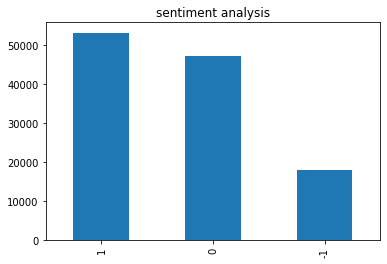

In [ ]:
df.sentiment.value_counts().plot(kind='bar',title="sentiment analysis")

Download the CSV file

In [ ]:
from google.colab import files
df.to_csv('bitcoin_tweets.csv')
files.download('bitcoin_tweets.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>